In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("report.csv")
df.head()

,experiment_name,experiment_iteration,task_number,code_fix_count,code_syntax_status,obj_expected,obj_given,obj_status,sum_prompt_tokens,sum_completion_tokens,sum_prompt_tokens_price,sum_completion_tokens_price,sum_price
0,experiment_3a1,1,1,0,True,7.864000e+01,7.863760e+01,True,938,688,0.000141,0.000413,0.000553
1,experiment_3a1,1,2,0,True,2.712500e+08,2.600000e+08,False,2364,2068,0.000355,0.001241,0.001595
2,experiment_3a1,1,3,0,True,3.530000e+02,3.424000e+02,False,1575,1399,0.000236,0.000839,0.001076
3,experiment_3a1,1,4,0,True,1.500000e+01,1.500000e+01,True,934,809,0.000140,0.000485,0.000625
4,experiment_3b1,1,1,1,False,7.864000e+01,NaN,False,1627,1036,0.000244,0.000622,0.000866


In [2]:
experiment_efficiency = df.groupby(["experiment_name", "experiment_iteration"])[
                               "obj_status"].mean() * 100  #.sum() / 18 * 100
experiment_efficiency_std = experiment_efficiency.groupby("experiment_name").std()   

In [3]:

experiment_efficiency = experiment_efficiency.groupby("experiment_name").mean()

In [4]:

experiment_cost = df.groupby(["experiment_name", "experiment_iteration"])["sum_price"].mean()
experiment_cost_std = experiment_cost.groupby("experiment_name").std()   
experiment_cost = experiment_cost.groupby("experiment_name").mean()

In [5]:

experiment = pd.merge(experiment_efficiency, experiment_cost, on="experiment_name")

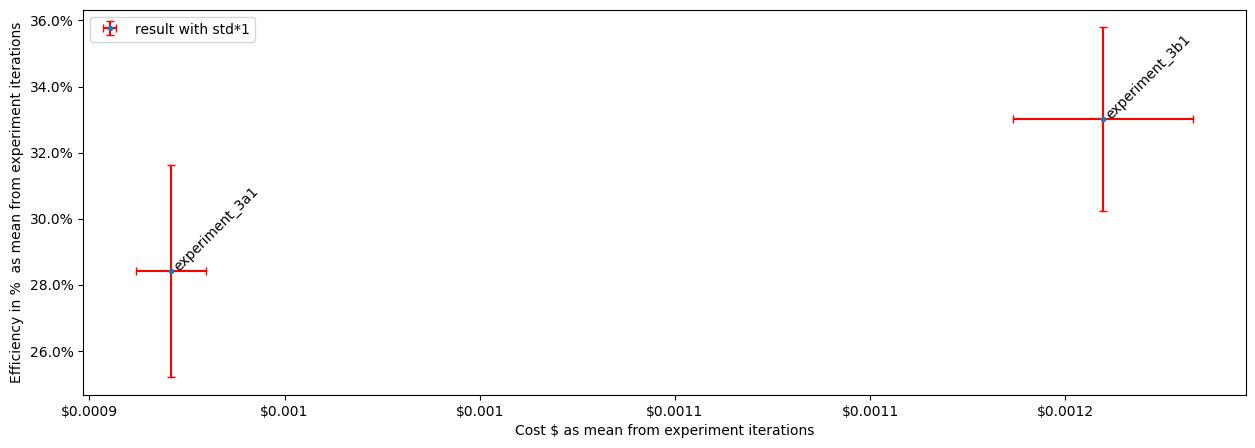

In [6]:

fig, ax = plt.subplots(figsize=(15, 5))
# ax.scatter(experiment["sum_price"], experiment["obj_status"], marker='x')
ax.set_xlabel("Cost $ as mean from experiment iterations")
ax.set_ylabel("Efficiency in %  as mean from experiment iterations")
for i, txt in enumerate(experiment.index):
    ax.annotate(txt, (experiment["sum_price"][i], experiment["obj_status"][i]), rotation=45)
    # rotate text
# add to x label $ sign to the number
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(round(x, 4))))
# add to y label % sign to the number
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(round(x, 1))))

ax.errorbar(experiment["sum_price"], experiment["obj_status"], xerr=experiment_cost_std.values, yerr=experiment_efficiency_std.values, fmt='.', capsize=3, ecolor='red')

plt.legend(["result with std*1"])
plt.show()